In [159]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [160]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
advertising = pd.read_csv("advertising.csv")

In [162]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [163]:
advertising.shape

(200, 4)

In [164]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [165]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


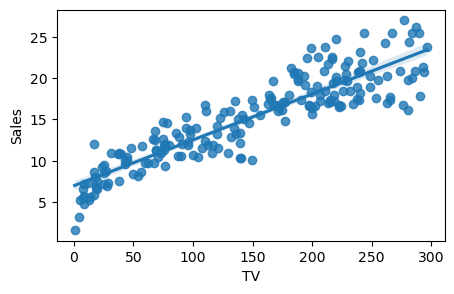

In [166]:
plt.figure(figsize=(5,3))
sns.regplot(x='TV',y='Sales',data=advertising)
plt.show()

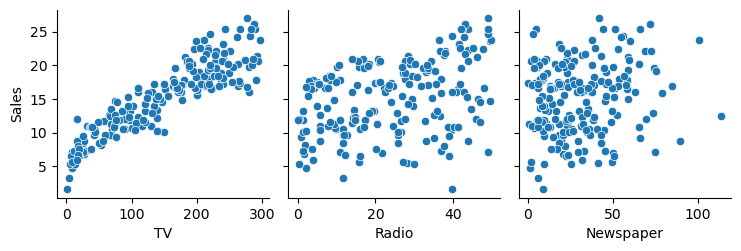

In [167]:
sns.pairplot(advertising,x_vars=["TV","Radio","Newspaper"],y_vars="Sales")
plt.show()

In [168]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

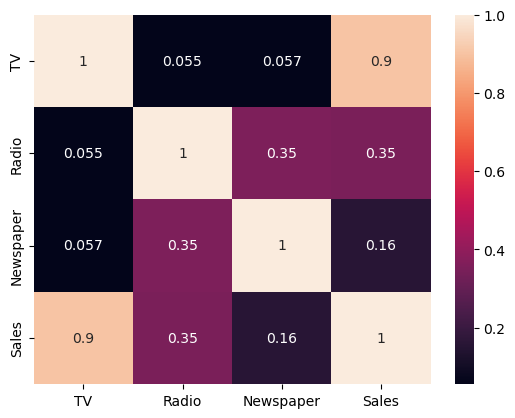

In [169]:
sns.heatmap(advertising.corr(),annot=True)

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.

### Step2 : Performing Simple Linear Regression

In [170]:
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [171]:
# create x and y
x= advertising['TV']
y= advertising['Sales']

In [172]:
#Split test train
from sklearn.model_selection import train_test_split

In [173]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [174]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [175]:
x_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

#### Building a linear model

In [176]:
import statsmodels.api as sm

In [177]:
# Add a constant to get an intercept
x_train_sm = sm.add_constant(x_train)
x_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [178]:
# y= c _ m1.x1
# y= c.const + m1.TV     ...... for our model

In [179]:
# Fit the resgression line using 'OLS'
#OLS stands for ordinary least squares
lr = sm.OLS(y_train,x_train_sm)
lr_model = lr.fit()

In [180]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [181]:
# sales = 6.94 +0.05TV

In [182]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           1.52e-52
Time:                        13:11:51   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Looking at some key statistics from the summary
The values we are concerned with are -

The coefficients and significance (p-values)
R-squared
F statistic and its significance
##### 1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

##### 2. R - squared is 0.816
Meaning that 81.6% of the variance in Sales is explained by TV

This is a decent R-squared value.

##### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

##### 𝑆𝑎𝑙𝑒𝑠=6.948+0.054×𝑇𝑉

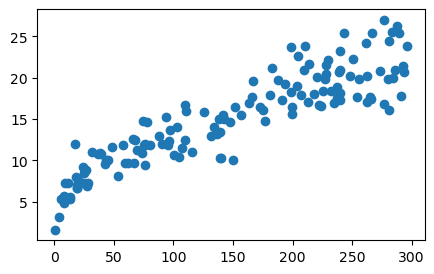

In [183]:
plt.figure(figsize=(5,3))
plt.scatter(x_train,y_train)

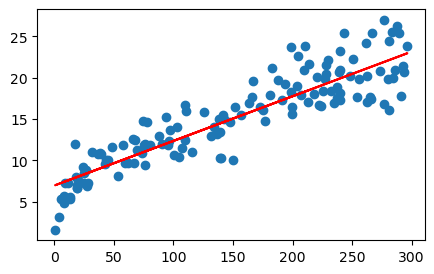

In [184]:
plt.figure(figsize=(5,3))
plt.scatter(x_train,y_train)
plt.plot(x_train,6.948+0.054*x_train,'r')
plt.show()

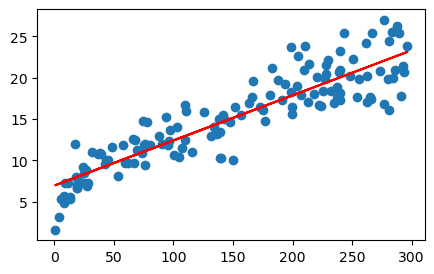

In [185]:
plt.figure(figsize=(5,3))
plt.scatter(x_train,y_train)
plt.plot(x_train,y_train_pred,'r')
plt.show()

## Step3: Residual Analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [186]:
# error =f(y_train, y_train_pred)

In [187]:
y_train_pred = lr_model.predict(x_train_sm)
y_train_pred.head()

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
dtype: float64

In [188]:
res = y_train-y_train_pred
res.head()

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
dtype: float64

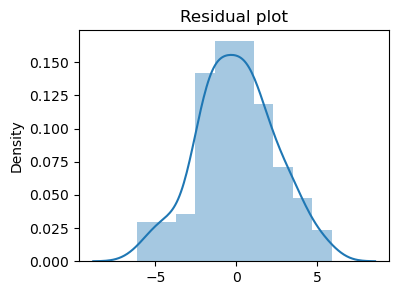

In [189]:
plt.figure(figsize=(4,3))
sns.distplot(res)
plt.title("Residual plot")
plt.show()

In [190]:
# The residuals are following the normally distributed with a mean 0. All good!

In [191]:
#### Looking for patterns in the residuals

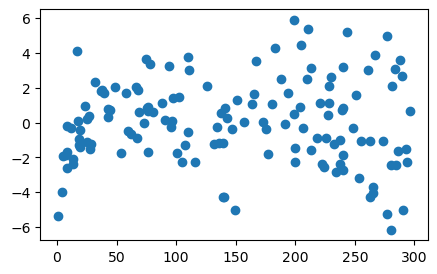

In [192]:
plt.figure(figsize=(5,3))
plt.scatter(x_train,res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

## Step 5: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [193]:
# Add a constant to X_test
x_test_sm = sm.add_constant(x_test)
x_test_sm.head()

,const,TV
126,1.0,7.8
104,1.0,238.2
99,1.0,135.2
92,1.0,217.7
111,1.0,241.7


In [194]:
# Predict the y values corresponding to X_test_sm
y_pred = lr_model.predict(x_test_sm)

In [195]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [196]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

In [197]:
# r-sq on test set
r_sq = r2_score(y_test,y_pred)
r_sq

0.7921031601245659

#### Visualizing the fit on the test set

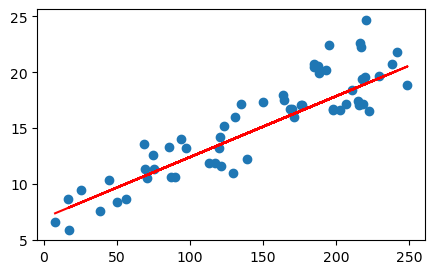

In [199]:
plt.figure(figsize=(5,3))
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,'r')
plt.show()

# Linear Regression using `linear_model` in `sklearn`

Apart from `statsmodels`, there is another package namely `sklearn` that can be used to perform linear regression. We will use the `linear_model` library from `sklearn` to build the model. Since, we hae already performed a train-test split, we don't need to do it again.

There's one small step that we need to add, though. When there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully. 

In [212]:
from sklearn.model_selection import train_test_split
x_train_lm, x_test_lm, y_train_lm, y_test_lm = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [214]:
x_train_lm.shape

(140,)

In [216]:
x_train_lm = x_train_lm.values.reshape(-1,1)
x_test_lm = x_test_lm.values.reshape(-1,1)

In [217]:
print(x_train_lm.shape)
print(y_train_lm.shape)
print(x_test_lm.shape)
print(y_test_lm.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [218]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(x_train_lm, y_train_lm)

LinearRegression()

In [219]:
print(lm.intercept_)
print(lm.coef_)

6.948683200001357
[0.05454575]


from above eq we got
#### Sales = 6.94 + 0.55TV

In [221]:
# prediction
y_train_lm_pred =lm.predict(x_train_lm)
y_test_lm_pred =lm.predict(x_test_lm)

In [227]:
# evaluate the model
r2_train=r2_score(y_train_lm,y_train_lm_pred)
r2_test=r2_score(y_test_lm,y_test_lm_pred)
print(r2_train,r2_test)

0.8157933136480389 0.7921031601245662
